<a href="https://colab.research.google.com/github/Prasenjit10/ML-ASSIGNMENTS/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ==========================================================
# (a) Load the dataset and perform data cleaning
# ==========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.optimize import curve_fit

# Load dataset
df = pd.read_csv("china_gdp.csv")

# Display basic information
print("Dataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# Remove duplicates if any
df = df.drop_duplicates()

# Extract variables
x = df["Year"].values
y = df["Value"].values


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    55 non-null     int64  
 1   Value   55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1012.0 bytes
None

Missing Values:
 Year     0
Value    0
dtype: int64


In [2]:
# ==========================================================
# (b) Split the dataset into training and testing sets
# ==========================================================

X_train, X_test, y_train, y_test = train_test_split(
    x.reshape(-1, 1), y, test_size=0.2, random_state=42
)

# ==========================================================
# (c) Train a Non-Linear Regression Model (Logistic curve)
# ==========================================================

# Logistic growth function
def logistic(x, L, x0, k):
    return L / (1 + np.exp(-k * (x - x0)))

# Fit the logistic model to full data (non-linear regression)
popt, _ = curve_fit(logistic, x, y, p0=[1e13, 1990, 0.03])

# Predict GDP values
y_pred = logistic(x, *popt)

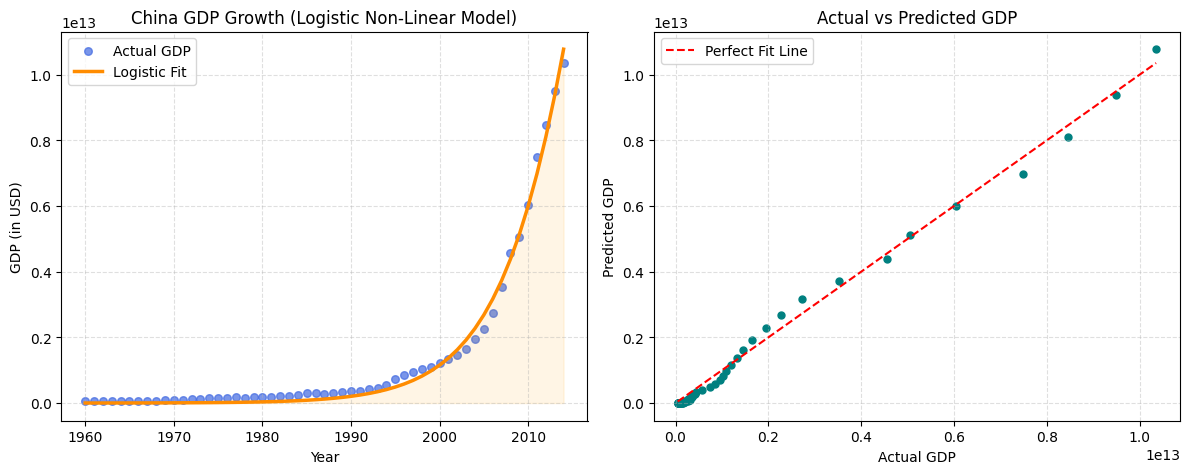

In [3]:
# ==========================================================
# Visualization
# ==========================================================

plt.figure(figsize=(12, 5))

# Plot 1 — Logistic GDP Curve
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='royalblue', s=30, label='Actual GDP', alpha=0.7)
plt.plot(x, y_pred, color='darkorange', linewidth=2.5, label='Logistic Fit')
plt.fill_between(x, y_pred, color='orange', alpha=0.1)
plt.xlabel("Year")
plt.ylabel("GDP (in USD)")
plt.title("China GDP Growth (Logistic Non-Linear Model)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)

# Plot 2 — Actual vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred, color='teal', s=25)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Perfect Fit Line")
plt.xlabel("Actual GDP")
plt.ylabel("Predicted GDP")
plt.title("Actual vs Predicted GDP")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()